In [12]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Add the parent directory (project directory) to the Python path
project_dir = os.path.dirname(notebook_dir)
sys.path.append(project_dir)

<hr>

In [13]:
from util import excel_table

table = excel_table.read("./data/106", has_header=True)
print(table);

[[25.0 2.5 100.0 None 11.3 11.0 10.1 None]
 [25.0 2.5 100.0 None 11.7 11.0 10.0 None]
 [25.0 2.5 100.0 None 11.3 11.0 10.1 None]
 [25.0 2.5 75.0 None 9.4 9.0 10.0 None]
 [25.0 2.5 50.0 None 7.9 7.0 9.2 None]
 [25.0 2.5 25.0 None 5.5 6.0 11.3 None]
 [nan nan nan None nan nan nan None]
 [25.0 10.0 100.0 None 2.7 11.0 10.1 None]
 [25.0 10.0 100.0 None 2.8 11.0 10.0 None]
 [25.0 10.0 100.0 None 2.7 12.0 10.8 None]
 [25.0 10.0 75.0 None 2.5 10.0 10.4 None]
 [25.0 10.0 50.0 None 2.0 8.0 10.3 None]
 [25.0 10.0 25.0 None 1.5 6.0 11.1 None]
 [nan nan nan None nan nan nan None]
 [50.0 2.5 100.0 None 7.5 17.0 10.6 None]
 [50.0 2.5 100.0 None 7.5 18.0 11.3 None]
 [50.0 2.5 100.0 None 7.5 17.0 10.8 None]
 [50.0 2.5 75.0 None 6.6 14.0 10.1 None]
 [50.0 2.5 50.0 None 5.4 12.0 10.9 None]
 [50.0 2.5 25.0 None 3.8 9.0 10.5 None]
 [nan nan nan None nan nan nan None]
 [50.0 10.0 100.0 None 2.1 16.0 10.2 None]
 [50.0 10.0 100.0 None 1.9 16.0 10.3 None]
 [50.0 10.0 100.0 None 1.9 16.0 10.3 None]
 [50.0 10.0

In [14]:
from util.structs import Data;
from util.structs import Dataset;
from util.structs import Measurement;

data = Data();

for row in table:
    m = row[0] * 1e-3;
    r = row[1] * 1e-2;
    h = row[2] * 1e-2;
    t = row[4];
    n = row[5];
    Tn = row[6];

    dataset = Dataset({
        "m": Measurement(m, 0),
        "r": Measurement(r, 0), 
        "h": Measurement(h, 0), 
        "t": Measurement(t, 0.5), 
        "n": Measurement(n, 0), 
        "T(n)": Measurement(Tn, 0.5)
    })
    data.add(dataset)

data = data.filter_null(["m"]);
print(data)

Dataset: len 24
   0: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  1.000 ±   0.000), t: ( 11.300 ±   0.500), n: ( 11.000 ±   0.000), T(n): ( 10.100 ±   0.500) ]
   1: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  1.000 ±   0.000), t: ( 11.700 ±   0.500), n: ( 11.000 ±   0.000), T(n): ( 10.000 ±   0.500) ]
   2: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  1.000 ±   0.000), t: ( 11.300 ±   0.500), n: ( 11.000 ±   0.000), T(n): ( 10.100 ±   0.500) ]
   3: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.750 ±   0.000), t: (  9.400 ±   0.500), n: (  9.000 ±   0.000), T(n): ( 10.000 ±   0.500) ]
   4: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.500 ±   0.000), t: (  7.900 ±   0.500), n: (  7.000 ±   0.000), T(n): (  9.200 ±   0.500) ]
   5: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.250 ±   0.000), t: (  5.500 ±   0.500), n: (  6.000 ±   0.000), T(n): ( 11.300 ±   0.500) ]
   6: [ m: (  0.025 ±   0.000), r: (  0.100 ±   

In [15]:

for m in [25e-3, 50e-3]:
    for r in [2.5e-2, 10e-2]:
        for h in [25e-2, 50e-2, 75e-2, 100e-2]:
            filtered = data.filter("m", m).filter("r", r).filter("h", h)
            if(len(filtered) <= 1): continue;

            data.remove(filtered);
            data.add(filtered.mean());

print(data)

Dataset: len 16
   0: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.750 ±   0.000), t: (  9.400 ±   0.500), n: (  9.000 ±   0.000), T(n): ( 10.000 ±   0.500) ]
   1: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.500 ±   0.000), t: (  7.900 ±   0.500), n: (  7.000 ±   0.000), T(n): (  9.200 ±   0.500) ]
   2: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.250 ±   0.000), t: (  5.500 ±   0.500), n: (  6.000 ±   0.000), T(n): ( 11.300 ±   0.500) ]
   3: [ m: (  0.025 ±   0.000), r: (  0.100 ±   0.000), h: (  0.750 ±   0.000), t: (  2.500 ±   0.500), n: ( 10.000 ±   0.000), T(n): ( 10.400 ±   0.500) ]
   4: [ m: (  0.025 ±   0.000), r: (  0.100 ±   0.000), h: (  0.500 ±   0.000), t: (  2.000 ±   0.500), n: (  8.000 ±   0.000), T(n): ( 10.300 ±   0.500) ]
   5: [ m: (  0.025 ±   0.000), r: (  0.100 ±   0.000), h: (  0.250 ±   0.000), t: (  1.500 ±   0.500), n: (  6.000 ±   0.000), T(n): ( 11.100 ±   0.500) ]
   6: [ m: (  0.050 ±   0.000), r: (  0.025 ±   

In [16]:
from util import mymath;

for set in data:
    value = set["T(n)"] / set["n"] ;
    set["T(1)"] = value.round_significant(2)

In [17]:
import numpy as np;

for set in data:
    value = 2 * np.pi / set["T(1)"]; 
    set["w"] = value.round_significant(2)

# print(data)
print(data.filter("m", 25e-3).filter("r", 2.5e-2)) 

Dataset: len 4
  0: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.750 ±   0.000), t: (  9.400 ±   0.500), n: (  9.000 ±   0.000), T(n): ( 10.000 ±   0.500), T(1): (  1.110 ±   0.060), w: (  5.660 ±   0.310) ]
  1: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.500 ±   0.000), t: (  7.900 ±   0.500), n: (  7.000 ±   0.000), T(n): (  9.200 ±   0.500), T(1): (  1.310 ±   0.080), w: (  4.800 ±   0.300) ]
  2: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.250 ±   0.000), t: (  5.500 ±   0.500), n: (  6.000 ±   0.000), T(n): ( 11.300 ±   0.500), T(1): (  1.880 ±   0.090), w: (  3.340 ±   0.160) ]
  3: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  1.000 ±   0.000), t: ( 11.433 ±   0.500), n: ( 11.000 ±   0.000), T(n): ( 10.067 ±   0.500), T(1): (  0.920 ±   0.050), w: (  6.830 ±   0.380) ]



In [18]:
for set in data:
    value = set["w"]**2
    set["w^2"] = value.round_significant(2);

print(data.sort("h").sort("r").sort("m"))

Dataset: len 16
   0: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.250 ±   0.000), t: (  5.500 ±   0.500), n: (  6.000 ±   0.000), T(n): ( 11.300 ±   0.500), T(1): (  1.880 ±   0.090), w: (  3.340 ±   0.160), w^2: ( 11.160 ±   1.070) ]
   1: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.500 ±   0.000), t: (  7.900 ±   0.500), n: (  7.000 ±   0.000), T(n): (  9.200 ±   0.500), T(1): (  1.310 ±   0.080), w: (  4.800 ±   0.300), w^2: ( 23.040 ±   2.880) ]
   2: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  0.750 ±   0.000), t: (  9.400 ±   0.500), n: (  9.000 ±   0.000), T(n): ( 10.000 ±   0.500), T(1): (  1.110 ±   0.060), w: (  5.660 ±   0.310), w^2: ( 32.040 ±   3.510) ]
   3: [ m: (  0.025 ±   0.000), r: (  0.025 ±   0.000), h: (  1.000 ±   0.000), t: ( 11.433 ±   0.500), n: ( 11.000 ±   0.000), T(n): ( 10.067 ±   0.500), T(1): (  0.920 ±   0.050), w: (  6.830 ±   0.380), w^2: ( 46.650 ±   5.200) ]
   4: [ m: (  0.025 ±   0.000), r: (  0.100 ±   0.00

0.025 0.025 P(0.625, 28.222499999999997)
( 46.188 ±   0.000) ( -0.645 ±   0.000)
0.025 0.1 P(0.625, 29.842499999999998)
( 48.364 ±   0.000) ( -0.385 ±   0.000)
0.05 0.025 P(0.625, 63.015)
( 96.112 ±   0.000) (  2.945 ±   0.000)
0.05 0.1 P(0.625, 61.21)
( 85.248 ±   0.000) (  7.930 ±   0.000)


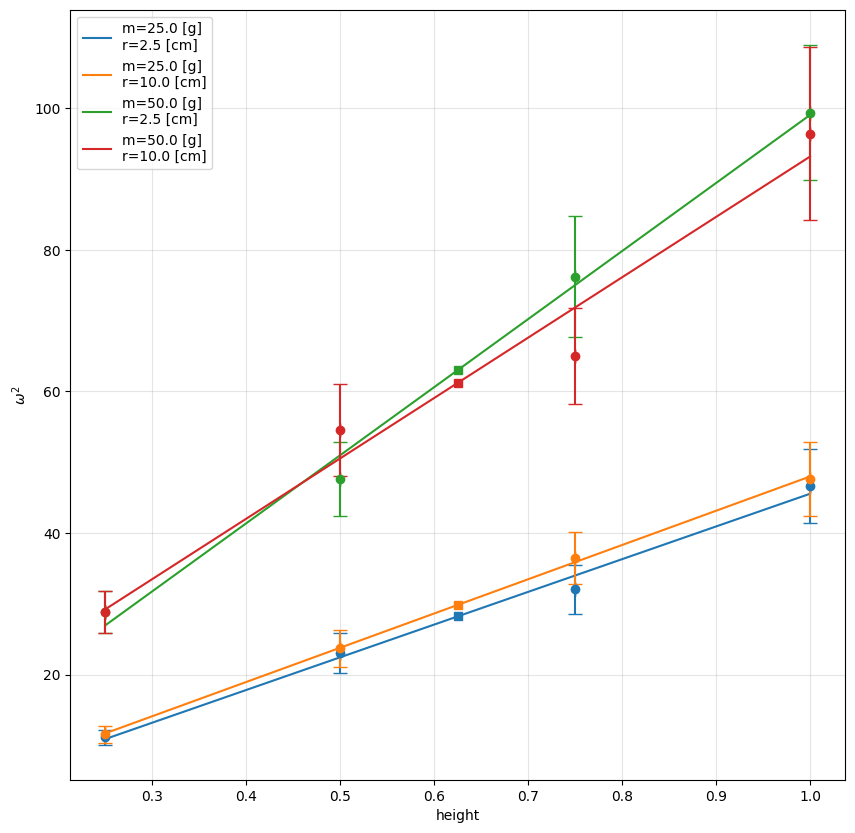

In [19]:

import numpy as np;
import matplotlib.pyplot as plt;

from util import graph_fit
from util import graph

plot = plt.subplots(figsize=(10, 10));
fig, ax = plot;

ax.grid(alpha=.33)
ax.set_ylabel(r"$\omega^2$")
ax.set_xlabel("height")

plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
i = 0;

for mass in [25e-3, 50e-3]:
    for radius in [2.5e-2, 10e-2]:
        filtered = data.filter("m", mass).filter("r", radius);

        x, y = np.array([]), np.array([]);

        for set in filtered:
            x = np.append(x, set["h"])
            y = np.append(y, set["w^2"])

        graph.scatter(x, y, p=plot, color=plot_colors[i]);

        m, n, sp = graph_fit.fit(x,y)

        print(mass, radius, sp)
        print(m, n)

        graph.scatter([sp.x], [sp.y], color=plot_colors[i], p=plot, fmt="s")

        graph.lineplot_around_sp(m.value, sp, p=plot, start=min(data.values("h")), end=max(data.values("h")), label=f"m={mass*1000} [g]\nr={radius*100} [cm]", color=plot_colors[i])

        i = i+1;

ax.legend()

In [20]:
from util.structs import Dataset;

g = Measurement(9.81, 0);

# Steigung von https://curve.fit
incline_data = Data([
    Dataset({
        "m": Measurement(25e-3, 0),
        "r": Measurement(2.5e-2, 0),
        "m_st": Measurement(46.19, 2.96)
    }),
    Dataset({
        "m": Measurement(25e-3, 0),
        "r": Measurement(10e-2, 0),
        "m_st": Measurement(48.36, 0.91)
    }),
    Dataset({
        "m": Measurement(50e-3, 0),
        "r": Measurement(2.5e-2, 0),
        "m_st": Measurement(96.11, 5.14)
    }),
    Dataset({
        "m": Measurement(50e-3, 0),
        "r": Measurement(10e-2, 0),
        "m_st": Measurement(85.25, 1.10)
    })
])

for set in incline_data:
    value = 2 * set["m"] * g / set["m_st"] +  -set["m"] * set["r"]**2
    set["I"] = value;

for set in incline_data:
    print(set["I"] * 1000, "e-3")

Warning! Addition of different Units:  and 
Warning! Addition of different Units:  and 
Warning! Addition of different Units:  and 
Warning! Addition of different Units:  and 
( 10.604 ±   0.681) e-3
(  9.893 ±   0.191) e-3
( 10.176 ±   0.546) e-3
( 11.007 ±   0.148) e-3


--
(  9.400 ±   0.500) (  5.660 ±   0.310)
(  7.900 ±   0.500) (  4.800 ±   0.300)
(  5.500 ±   0.500) (  3.340 ±   0.160)
( 11.433 ±   0.500) (  6.830 ±   0.380)
P(8.5583325, 5.157500000000001)
--
(  2.500 ±   0.500) (  6.040 ±   0.300)
(  2.000 ±   0.500) (  4.870 ±   0.270)
(  1.500 ±   0.500) (  3.400 ±   0.170)
(  2.733 ±   0.500) (  6.900 ±   0.380)
P(2.18333325, 5.3025)
--
(  6.600 ±   0.500) (  8.730 ±   0.490)
(  5.400 ±   0.500) (  6.900 ±   0.380)
(  3.800 ±   0.500) (  5.370 ±   0.280)
(  7.500 ±   0.500) (  9.970 ±   0.480)
P(5.825, 7.7425)
--
(  1.600 ±   0.500) (  8.060 ±   0.420)
(  1.500 ±   0.500) (  7.390 ±   0.440)
(  1.100 ±   0.500) (  5.370 ±   0.280)
(  1.967 ±   0.500) (  9.820 ±   0.620)
P(1.54166675, 7.66)


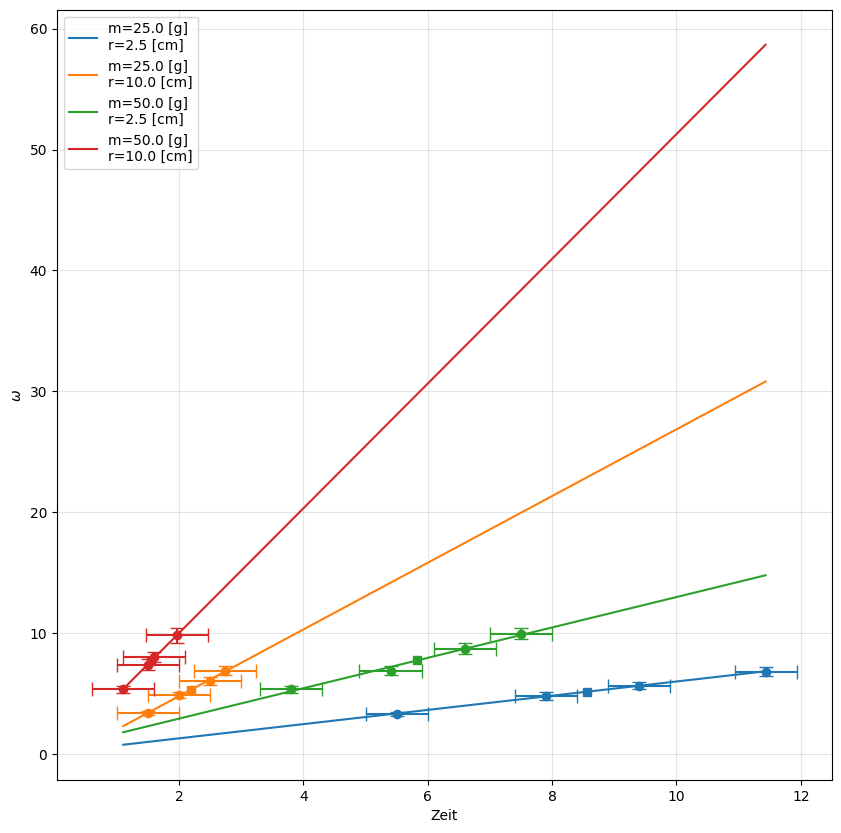

In [21]:

import numpy as np;
import matplotlib.pyplot as plt;

from util import graph_fit
from util import graph

plot = plt.subplots(figsize=(10, 10));
fig, ax = plot;

ax.grid(alpha=.33)
ax.set_ylabel(r"$\omega$")
ax.set_xlabel("Zeit")

plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
i = 0;

for mass in [25e-3, 50e-3]:
    for radius in [2.5e-2, 10e-2]:
        filtered = data.filter("m", mass).filter("r", radius);

        x, y = np.array([]), np.array([]);

        for set in filtered:
            y = np.append(y, set["t"])
            x = np.append(x, set["w"])

        x, y = y, x

        # [print(i, j) for i, j in zip(x, y)]

        graph.scatter(x, y, p=plot, color=plot_colors[i]);

        m, n, sp = graph_fit.fit(x,y)

        print("--")
        [print(i, j) for i, j in zip(x, y)]
        print(sp)
        # print(mass, radius)
        # print(m, n)

        graph.scatter([sp.x], [sp.y], color=plot_colors[i], p=plot, fmt="s")

        graph.lineplot_around_sp(m.value, sp, p=plot, start=min(data.values("t")), end=max(data.values("t")), label=f"m={mass*1000} [g]\nr={radius*100} [cm]", color=plot_colors[i])

        i = i+1;

ax.legend()

In [22]:
from util.structs import Dataset;

g = Measurement(9.81, 0, "m Hz^2");

# Steigung von https://curve.fit
incline_data = Data([
    Dataset({
        "m": Measurement(25e-3, 0, "kg"),
        "r": Measurement(2.5e-2, 0, "m"),
        "m_st": Measurement(588e-3, 7e-3, "Hz^2")
    }),
    Dataset({
        "m": Measurement(25e-3, 0, "kg"),
        "r": Measurement(10e-2, 0, "m"),
        "m_st": Measurement(2759e-3, 131e-3, "Hz^2")
    }),
    Dataset({
        "m": Measurement(50e-3, 0, "kg"),
        "r": Measurement(2.5e-2, 0, "m"),
        "m_st": Measurement(1256e-3, 96e-3)
    }),
    Dataset({
        "m": Measurement(50e-3, 0, "kg"),
        "r": Measurement(10e-2, 0, "m"),
        "m_st": Measurement(5155e-3, 137e-3, "Hz^2")
    })
])

for set in incline_data:
    value = set["r"] * set["m"] * g / set["m_st"] +  -set["m"] * set["r"]**2
    set["I"] = value;

for set in incline_data:
    print(set["I"] * 1000, "e-3")

Warning! Addition of different Units:  and 
Warning! Addition of different Units:  and 
Warning! Addition of different Units:  and 
Warning! Addition of different Units:  and 
( 10.412 ±   0.124) e-3
(  8.639 ±   0.422) e-3
(  9.732 ±   0.746) e-3
(  9.015 ±   0.253) e-3
